Data Overview:
  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  
Number of samples: 20000
Number of features: 16
Number of classes: 26


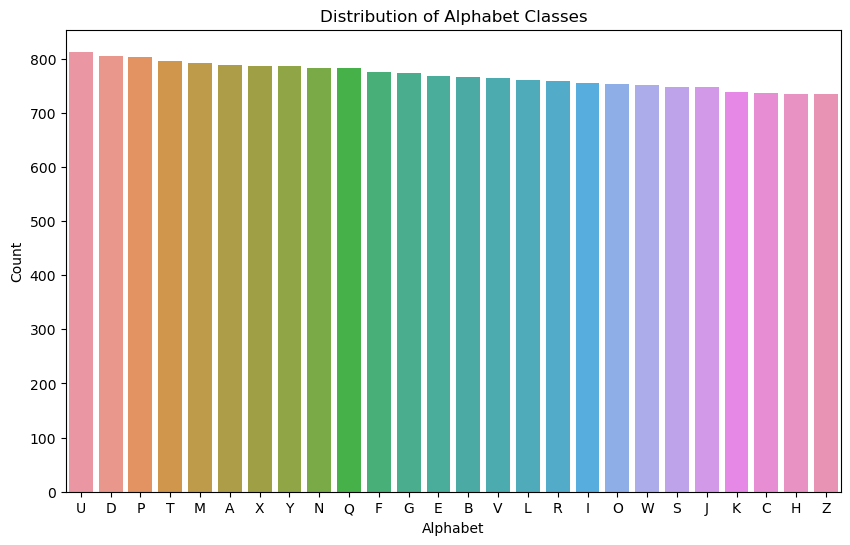

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = r'C:\Users\user\AppData\Local\Temp\4366543b-44a6-440f-bccd-2a27706ea7ae_Neural networks.zip.7ae\Neural networks\Alphabets_data.csv'
data = pd.read_csv(file_path)

# Data Overview
print("Data Overview:")
print(data.head())
print(f"Number of samples: {data.shape[0]}")
print(f"Number of features: {data.shape[1] - 1}")  # assuming the last column is the label
print(f"Number of classes: {len(data['letter'].unique())}")

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='letter', data=data, order=data['letter'].value_counts().index)
plt.title('Distribution of Alphabet Classes')
plt.xlabel('Alphabet')
plt.ylabel('Count')
plt.show()

# Data Preprocessing
# Handle missing values if any
data = data.dropna()

# Encode the labels
label_encoder = LabelEncoder()
data['letter'] = label_encoder.fit_transform(data['letter'])

# Separate features and labels
X = data.drop('letter', axis=1).values
y = data['letter'].values

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define a function to build the model
def build_model(units=64, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(units=units, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=units, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and Evaluate the Model
def train_evaluate_model(units, learning_rate, epochs=10):
    model = build_model(units, learning_rate)
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, batch_size=32, callbacks=[early_stopping], verbose=1)

    # Evaluate the model
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    from sklearn.metrics import classification_report, confusion_matrix

    print(f"Evaluation with units={units}, learning_rate={learning_rate}:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (units={units}, learning_rate={learning_rate})')
    plt.show()

    # Plot training and validation accuracy and loss
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2071 - loss: 2.7546 - val_accuracy: 0.6100 - val_loss: 1.4479
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6434 - loss: 1.2786 - val_accuracy: 0.7056 - val_loss: 1.0419
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7247 - loss: 0.9553 - val_accuracy: 0.7553 - val_loss: 0.8836
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7605 - loss: 0.8224 - val_accuracy: 0.7766 - val_loss: 0.7848
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7881 - loss: 0.7202 - val_accuracy: 0.7991 - val_loss: 0.7085
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8149 - loss: 0.6397 - val_accuracy: 0.8050 - val_loss: 0.6662
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8210 - loss: 0.6100 - val_accuracy: 0.8197 - val_loss: 0.6099
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8357 - loss: 0.5614 - val_accuracy: 0.8309 - val_

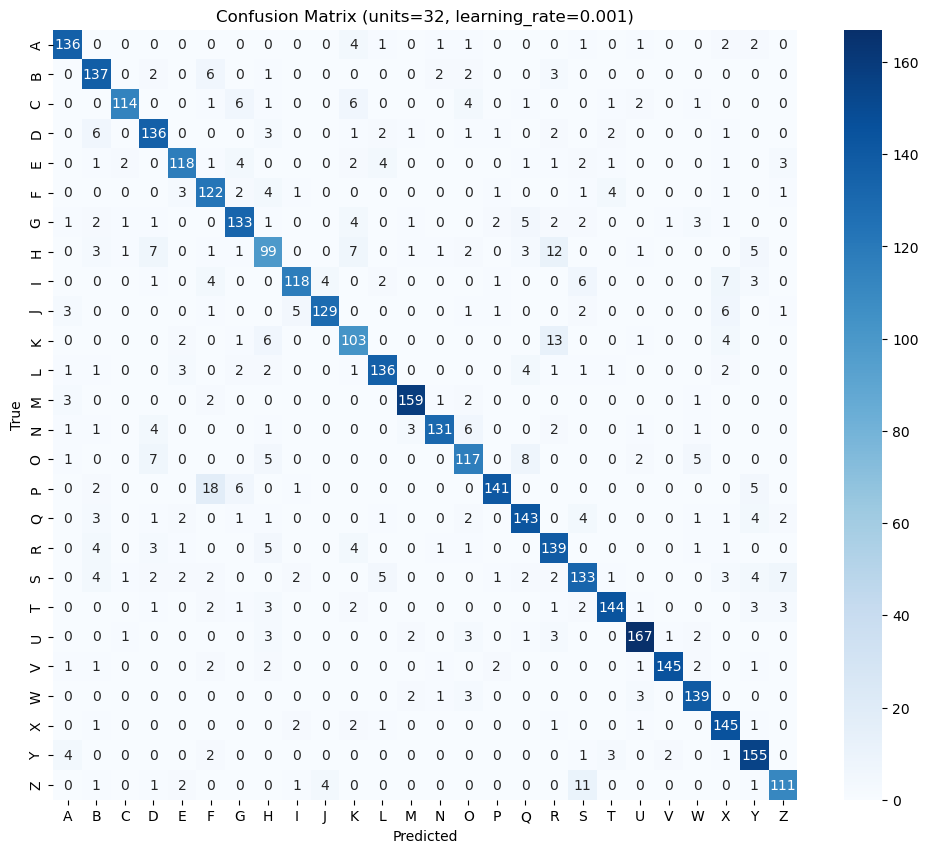

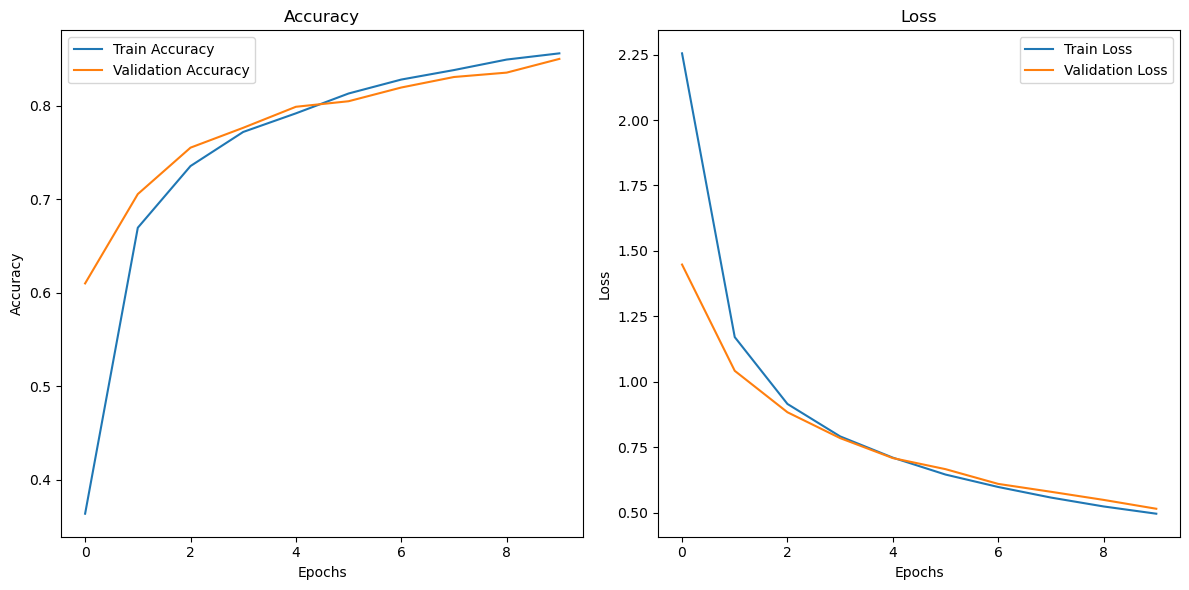

Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5197 - loss: 1.6437 - val_accuracy: 0.7831 - val_loss: 0.7177
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8061 - loss: 0.6214 - val_accuracy: 0.8100 - val_loss: 0.5863
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8444 - loss: 0.4945 - val_accuracy: 0.8550 - val_loss: 0.4584
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8665 - loss: 0.3979 - val_accuracy: 0.8709 - val_loss: 0.3992
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8820 - loss: 0.3674 - val_accuracy: 0.8772 - val_loss: 0.3891
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8949 - loss: 0.3282 - val_accuracy: 0.8744 - val_loss: 0.3936
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8990 - loss: 0.3096 - val_accuracy: 0.8894 - val_loss: 0.3721
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9091 - loss: 0.2723 - val_accuracy: 0.8800 - val_

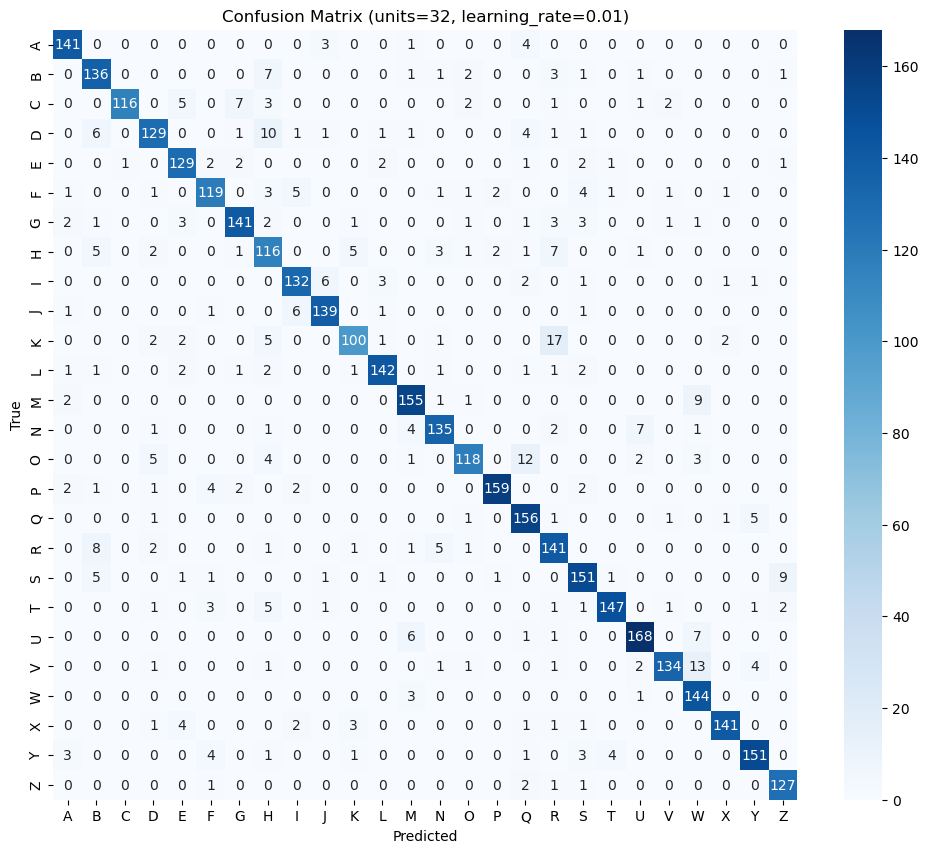

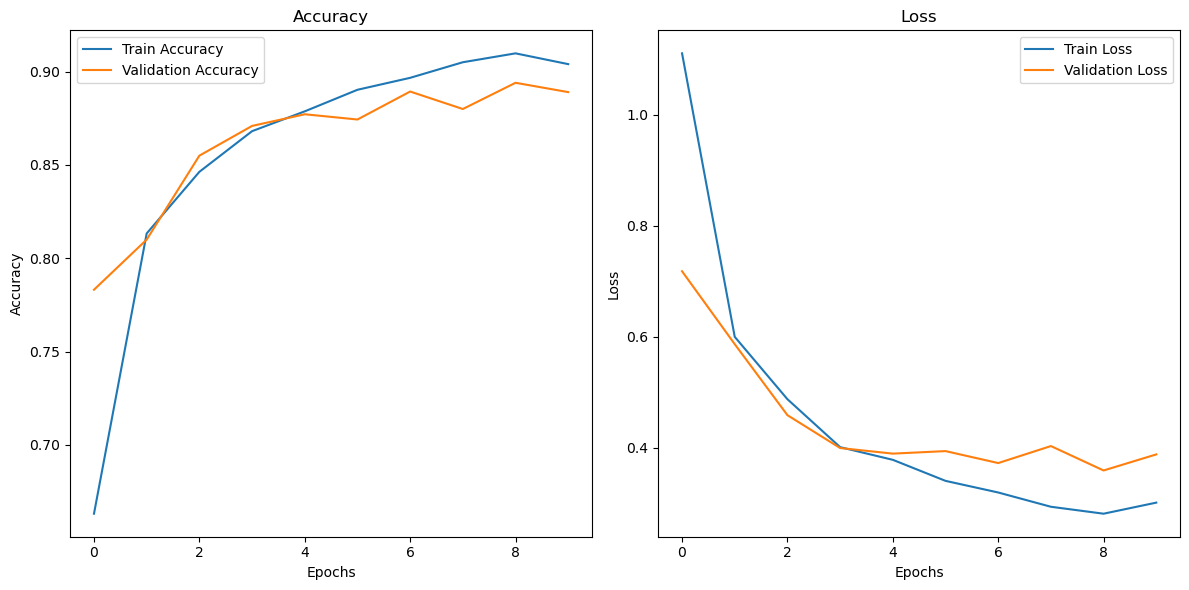

Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3570 - loss: 2.4076 - val_accuracy: 0.7159 - val_loss: 1.0244
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7440 - loss: 0.9057 - val_accuracy: 0.7788 - val_loss: 0.7590
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8036 - loss: 0.6823 - val_accuracy: 0.8159 - val_loss: 0.6141
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8401 - loss: 0.5530 - val_accuracy: 0.8413 - val_loss: 0.5388
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8564 - loss: 0.4761 - val_accuracy: 0.8537 - val_loss: 0.4742
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8743 - loss: 0.4267 - val_accuracy: 0.8750 - val_loss: 0.4243
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8862 - loss: 0.3689 - val_accuracy: 0.8903 - val_loss: 0.3786
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9057 - loss: 0.3246 - val_accuracy: 0.8947 - val_

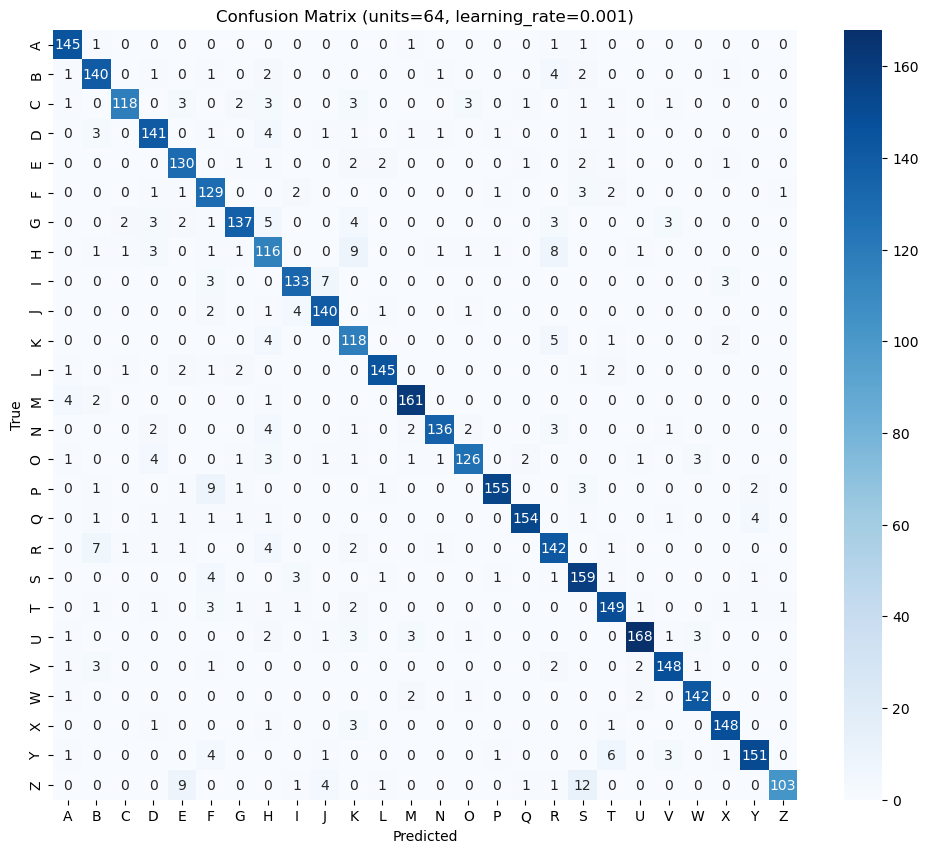

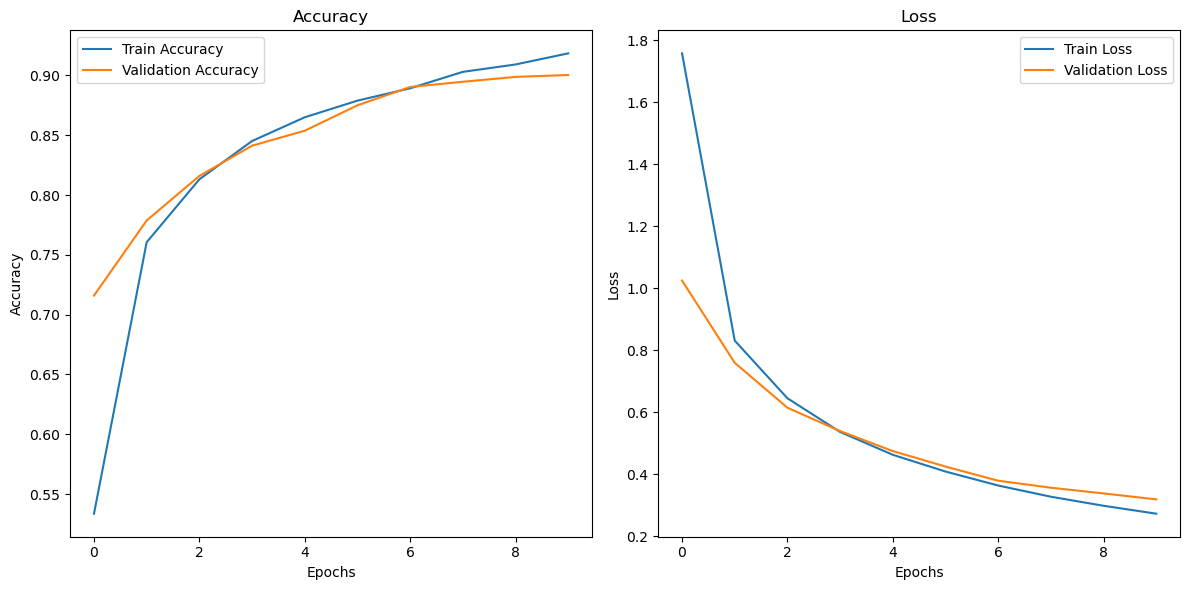

Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5829 - loss: 1.3888 - val_accuracy: 0.8209 - val_loss: 0.5502
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8578 - loss: 0.4461 - val_accuracy: 0.8534 - val_loss: 0.4619
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8911 - loss: 0.3408 - val_accuracy: 0.8828 - val_loss: 0.3357
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9073 - loss: 0.2860 - val_accuracy: 0.9116 - val_loss: 0.2914
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9125 - loss: 0.2718 - val_accuracy: 0.9016 - val_loss: 0.3253
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9242 - loss: 0.2254 - val_accuracy: 0.9112 - val_loss: 0.2704
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9310 - loss: 0.2030 - val_accuracy: 0.9272 - val_loss: 0.2494
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9371 - loss: 0.1800 - val_accuracy: 0.8994 - val_

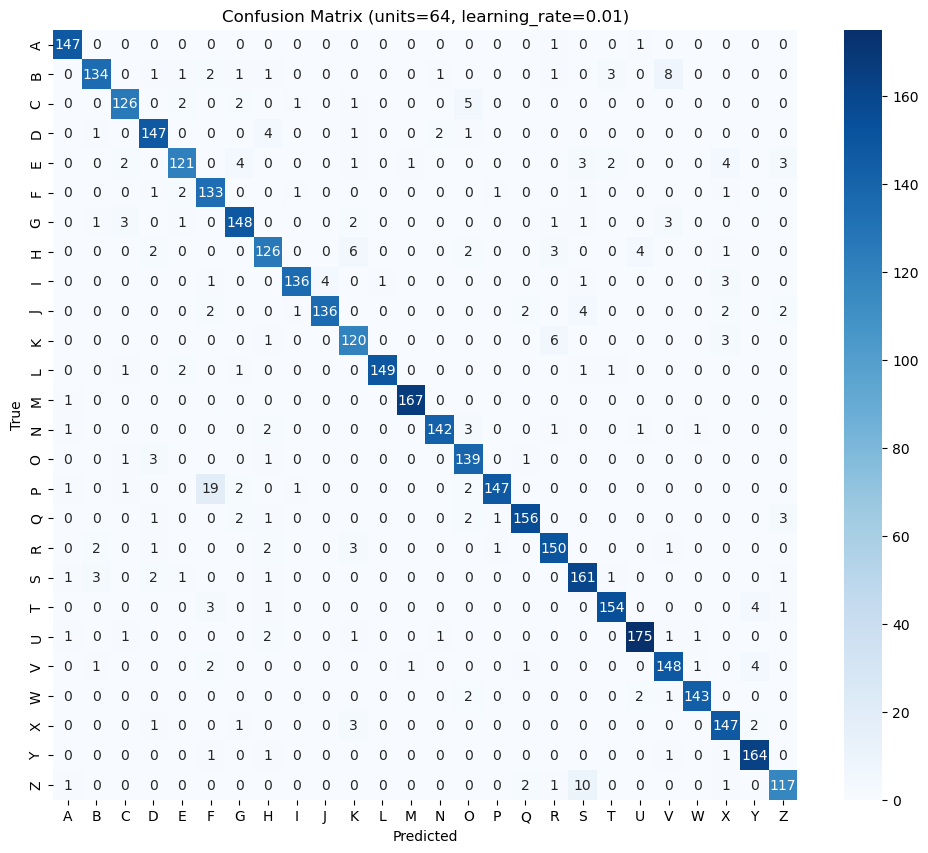

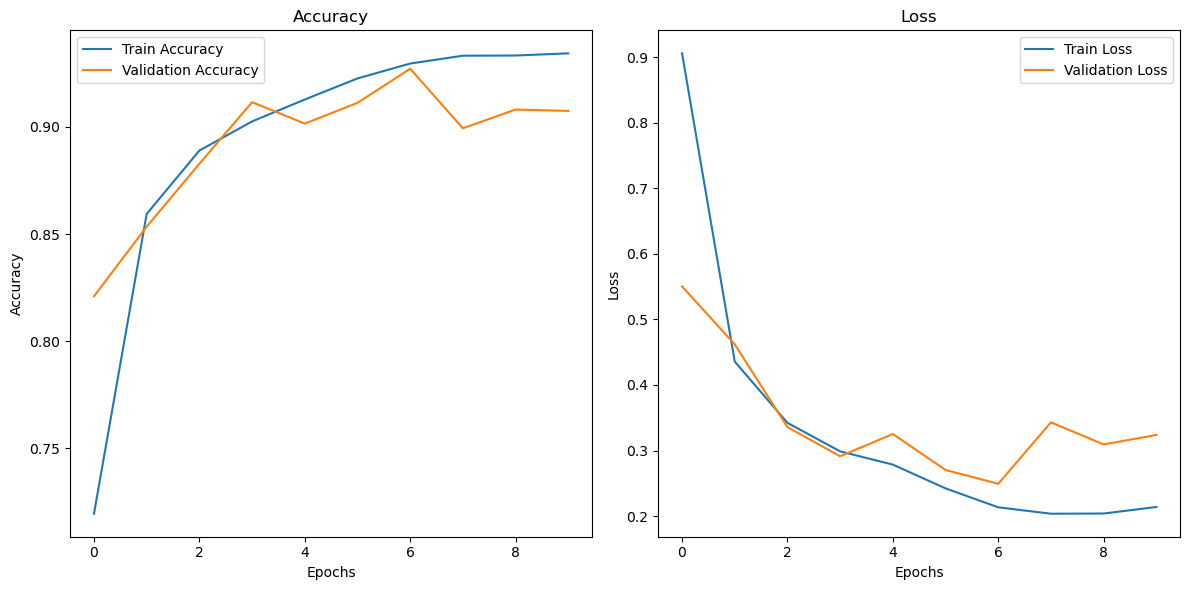

In [10]:
# Hyperparameter Tuning - Manual Grid Search
units_options = [32, 64]
learning_rate_options = [0.001, 0.01]
epochs = 10

for units in units_options:
    for learning_rate in learning_rate_options:
        train_evaluate_model(units, learning_rate, epochs=epochs)


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


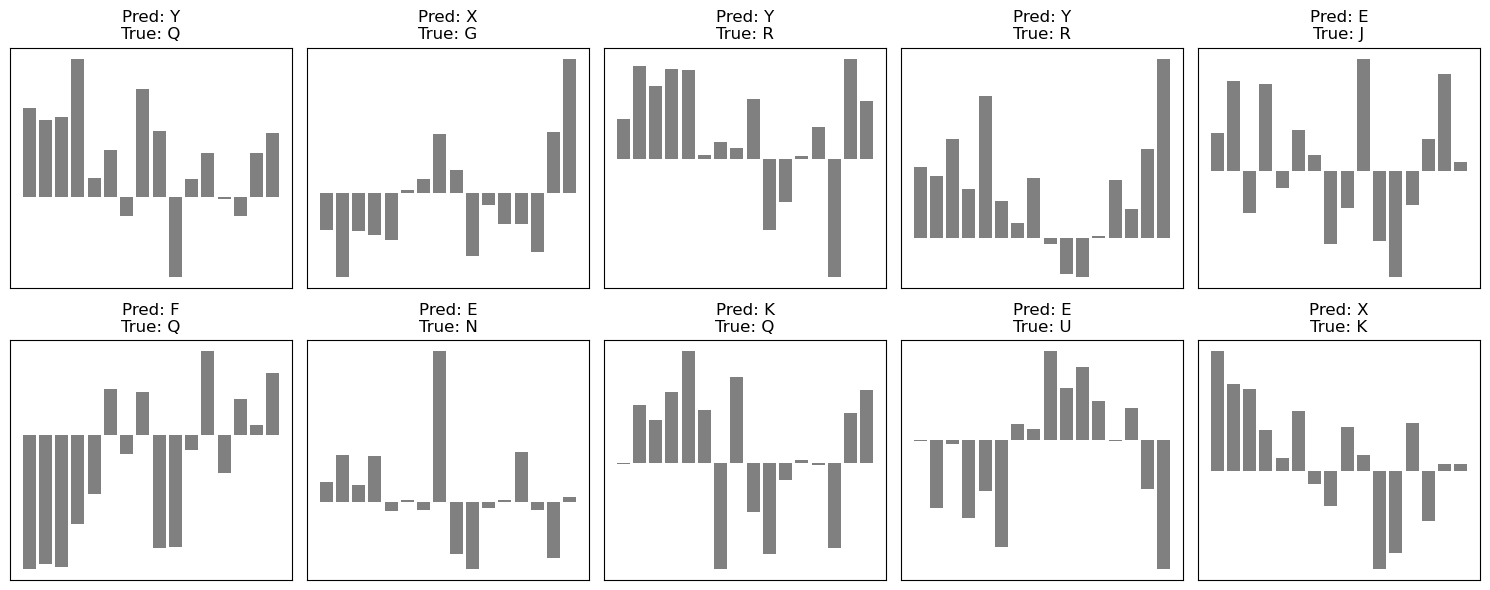

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Additional Visualization: Sample Predictions
def plot_predictions_vs_actuals(X_test, y_true, y_pred, label_encoder, num_samples=10):
    indices = np.random.choice(range(len(X_test)), num_samples, replace=False)
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(indices):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.bar(range(X_test.shape[1]), X_test[idx], color='gray')
        plt.title(f'Pred: {label_encoder.classes_[y_pred[idx]]}\nTrue: {label_encoder.classes_[y_true[idx]]}')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

# Plot sample predictions versus actuals
y_pred_prob = build_model(units=64, learning_rate=0.01).predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
plot_predictions_vs_actuals(X_test, y_test, y_pred, label_encoder)
